In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
AVA_DATASET_BASE_PATH = "/mnt/z/Descargas/AVA_Dataset"
IMAGES_PATH = AVA_DATASET_BASE_PATH + "/images/images/{image_id}.jpg"

In [3]:
images_data = pd.read_csv(AVA_DATASET_BASE_PATH + "/AVA.txt", sep=' ', header=None,
                          names=(['index', 'image_id'] + [str(i) for i in range(1, 11)] + ["tag1", "tag2", "challenge_id"])).drop(columns="index")

In [4]:
images_data

,image_id,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id
0,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396
1,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396
2,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396
3,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396
4,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255525,56938,1,7,17,40,84,56,31,13,6,1,9,0,181
255526,57304,1,0,8,25,50,65,55,26,18,7,1,18,181
255527,56711,0,0,8,11,26,47,48,56,30,22,9,24,181
255528,57303,0,2,19,30,75,60,30,25,5,2,22,0,181


In [5]:
images_data['total_votes'] = images_data[[str(i) for i in range(1, 11)]].sum(axis=1)
images_data['score'] = sum(images_data[str(i)]*i/10 for i in range(1, 11))/images_data['total_votes']
images_data

,image_id,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id,total_votes,score
0,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396,124,0.563710
1,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396,126,0.469841
2,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396,126,0.567460
3,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396,128,0.577344
4,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396,129,0.520930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255525,56938,1,7,17,40,84,56,31,13,6,1,9,0,181,256,0.533984
255526,57304,1,0,8,25,50,65,55,26,18,7,1,18,181,255,0.623529
255527,56711,0,0,8,11,26,47,48,56,30,22,9,24,181,248,0.707258
255528,57303,0,2,19,30,75,60,30,25,5,2,22,0,181,248,0.560887


In [6]:
images_data['total_votes'].min()

78

In [7]:
images_data = images_data[['image_id', 'score']]
images_data

,image_id,score
0,953619,0.563710
1,953958,0.469841
2,954184,0.567460
3,954113,0.577344
4,953980,0.520930
...,...,...
255525,56938,0.533984
255526,57304,0.623529
255527,56711,0.707258
255528,57303,0.560887


In [8]:
ids_to_use = []
with open(AVA_DATASET_BASE_PATH + "/aesthetics_image_lists/generic_ls_train.jpgl", "r") as file:
    for l in file:
        ids_to_use.append(l)
with open(AVA_DATASET_BASE_PATH + "/aesthetics_image_lists/generic_test.jpgl", "r") as file:
    for l in file:
        ids_to_use.append(int(l.rstrip()))
ids_to_use = set(ids_to_use)

In [9]:
images_data = images_data[images_data['image_id'].isin(ids_to_use)]
images_data

,image_id,score
4,953980,0.520930
48,954013,0.675000
83,953630,0.528226
141,771289,0.557895
151,771082,0.524848
...,...,...
255490,56554,0.443902
255491,57078,0.581405
255500,56459,0.534440
255503,57306,0.589370


(array([  10.,   55.,  375., 1805., 5602., 5250., 4995., 1582.,  239.,
          17.]),
 array([0.20668896, 0.26902007, 0.33135117, 0.39368227, 0.45601338,
        0.51834448, 0.58067559, 0.64300669, 0.70533779, 0.7676689 ,
        0.83      ]),
 <BarContainer object of 10 artists>)

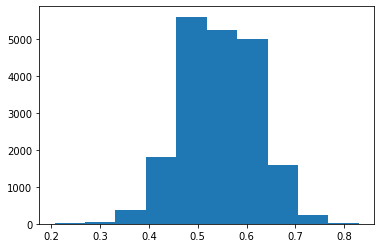

In [10]:
plt.hist(images_data['score'])

In [11]:
images_data['score'].mean()

0.5448402117532216

In [12]:
(abs(images_data['score']-images_data['score'].mean())/images_data['score']).mean()

0.11938479456958635

In [13]:
images_data = images_data.sample(len(images_data))
images_data['path'] = images_data['image_id'].map(lambda x: IMAGES_PATH.format(image_id=x))
images_data['score'] = (images_data['score']>0.5).astype('int')

In [14]:
(images_data['score']==1).mean()

0.7111891620672354

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from tensorflow.keras.layers import Flatten, Dense, Input,concatenate, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

In [ ]:
mobilenet = keras.applications.mobilenet.MobileNet()

In [ ]:
mobilenet.summary()

In [ ]:
outencoder = mobilenet.layers[-6].output

In [ ]:
encoder = Model(inputs=mobilenet.input, outputs=outencoder)
encoder.trainable = False

In [ ]:
input_regressor = encoder(mobilenet.input)

dense1 = Dense(256, activation='tanh')(input_regressor)
regressor = Dense(1, activation='sigmoid')(dense1)

final_model = Model(inputs=mobilenet.input, outputs=regressor)

In [ ]:
final_model.summary()

In [ ]:
BATCH_SIZE = 64

In [ ]:
from keras import backend as K

def earth_mover_distance(**kwargs):
    """
    Wrapper for earth_mover distance for unified interface with self-guided earth mover distance loss.
    """
    def _earth_mover_distance(
            y_true: K.placeholder,
            y_pred: K.placeholder
    ) -> K.placeholder:
        y_true = tf.cast(y_true, tf.float32)
        return tf.reduce_mean(tf.square(tf.cumsum(y_true, axis=-1) - tf.cumsum(y_pred, axis=-1)), axis=-1)

    return _earth_mover_distance

In [ ]:
train_generator = ImageDataGenerator(width_shift_range=0.15, 
                                     height_shift_range=0.15,
                                     horizontal_flip=False, 
                                     vertical_flip=False,
                                     zoom_range=0,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

traingen = train_generator.flow_from_dataframe(images_data,
                                               x_col='path',
                                               y_col='score',
                                               target_size=(224, 224),
                                               class_mode='raw',
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_dataframe(images_data,
                                               x_col='path',
                                               y_col='score',
                                               target_size=(224, 224),
                                               class_mode='raw',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

In [ ]:
final_model.compile(optimizer=Adam(0.0005), loss=earth_mover_distance(), metrics=['accuracy', tf.keras.metrics.AUC()])
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=6,
                           restore_best_weights=True,
                           mode='max')

In [25]:
final_model.compile(optimizer=Adam(0.0005), loss=earth_mover_distance(), metrics=['accuracy', tf.keras.metrics.AUC()])
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=6,
                           restore_best_weights=True,
                           mode='max')

In [26]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

hist = final_model.fit(traingen,
                     batch_size=BATCH_SIZE,
                     epochs=40,
                     validation_data=validgen,
                     steps_per_epoch=traingen.samples // BATCH_SIZE,
                     validation_steps=validgen.samples // BATCH_SIZE,
                     callbacks=[early_stop])

Epoch 1/40
152/264 [================>.............] - ETA: 2:10 - loss: 0.2000 - accuracy: 0.7176 - auc: 0.6408

/home/jian01/.pyenv/versions/3.9.5/envs/general/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


264/264 [==============================] - 370s 1s/step - loss: 0.1950 - accuracy: 0.7196 - auc: 0.6627 - val_loss: 0.1882 - val_accuracy: 0.7283 - val_auc: 0.7048
Epoch 2/40
264/264 [==============================] - 361s 1s/step - loss: 0.1767 - accuracy: 0.7402 - auc: 0.7308 - val_loss: 0.1898 - val_accuracy: 0.7208 - val_auc: 0.6979
Epoch 3/40
264/264 [==============================] - 353s 1s/step - loss: 0.1698 - accuracy: 0.7518 - auc: 0.7551 - val_loss: 0.1868 - val_accuracy: 0.7194 - val_auc: 0.7067
Epoch 4/40
264/264 [==============================] - 352s 1s/step - loss: 0.1637 - accuracy: 0.7632 - auc: 0.7729 - val_loss: 0.1846 - val_accuracy: 0.7245 - val_auc: 0.7027
Epoch 5/40
264/264 [==============================] - 352s 1s/step - loss: 0.1571 - accuracy: 0.7752 - auc: 0.7927 - val_loss: 0.1830 - val_accuracy: 0.7354 - val_auc: 0.7020
Epoch 6/40
264/264 [==============================] - 354s 1s/step - loss: 0.1506 - accuracy: 0.7849 - auc: 0.8118 - val_loss: 0.1864 - 

In [27]:
import os
import pickle
import tarfile
from abc import abstractmethod, ABC
from io import BytesIO
from tempfile import NamedTemporaryFile, TemporaryDirectory
from typing import Iterator, NamedTuple, Optional, overload, cast, List, Tuple, Union

def get_bytes_from_model(model: Model) -> bytes:
    model_path = TemporaryDirectory()

    model.save(model_path.name)
    with NamedTemporaryFile() as tar_temp_file:
        with tarfile.open(tar_temp_file.name, mode="w:gz") as archive:
            archive.add(model_path.name, arcname="model")

        model_path.cleanup()
        with open(tar_temp_file.name, "rb") as model_tarfile:
            model_bytes = model_tarfile.read()
    model_path.cleanup()
    return model_bytes

In [28]:
model_bytes = get_bytes_from_model(final_model)

INFO:tensorflow:Assets written to: /tmp/tmpi9vvm4dj/assets


In [29]:
with open('../web-api/beauty_model.model', 'wb') as file:
    file.write(model_bytes)